In [1]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

from   astropy.table import Table

In [2]:
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [3]:
import pubplot

In [4]:
def grab_ddplimit(fpath):
    dat = fits.open(fpath)

    result = {}
    
    for key in ['RLIM', 'GMR_0P0', 'GMR_0P1', 'ALL']:
        result[key] = dat[1].header[key]
        
    result['DATA'] = Table(dat[1].data)
    result['COUNT'] = fpath.split('_')[-1].replace('.fits', '')
    
    return result

In [5]:
! pwd

/cosma/home/durham/dc-wils7/DESI/docs/nb


In [6]:
fpaths = glob.glob(os.environ['HOME'] + '/data/GAMA4/ddrp_limits/*.fits')

In [7]:
ddp_limits = [grab_ddplimit(x) for x in fpaths]

In [8]:
gama_kE = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_kE.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,,,,,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64
186621,587725041704829065,185.22637399,-1.48484552,19.707304,0.15655,4,G12_Y3_013_084,5,21.00796,20.179195,19.758118,19.538584,19.657133,526.2218840329729,38.60584452582876,G12,-452.949002915617,-41.43182242297258,-11.790018871544799,0.42107773,0.3371333695571266,0,2,-0.11110247733432752,-0.027158118619969737,0.06198855923223209,0.15099516113794287,0.33207112636577363,2.12,-0.15185352,-0.331886,-18.808675567508615,-18.628643090725816,38.51597956836311,38.33594709158031,-0.06727912768008276,0.029344341562804438,0.14944575068211835,0.29451963127646774,-18.8961327589585
543518,588848898852848091,211.76792957,-0.89235905,19.017689,0.05258,4,G15_Y3_013_228,6,20.9524,19.807358,19.110891,18.695219,18.314579,164.25889781301044,36.07764452179613,G15,-132.65873114579134,-82.14913456297639,-2.4303746870844907,0.69646645,0.7649974613944354,0,5,-0.15789098198346954,-0.22642199745535949,0.06992529999751626,0.0987676138300845,0.6676241320902834,0.8,-0.0510026,-0.042064,-17.078878471273992,-17.087817070651862,36.09656722249469,36.10550582187256,-0.14680015512782418,-0.19364531489911876,0.06992472323437693,0.07152997481454451,-17.07887789451085
145492,587724650869751862,184.80116057,-1.36268178,18.077238,0.10614,4,G12_Y1_IS1_187,6,19.808687,18.545658,18.033491,17.711723,17.538279,344.76795967919503,37.68763449369432,G12,-310.50414838876634,-26.080095695731455,-7.412209189910756,0.512167,0.5042607723990307,0,3,-0.1005257374319281,-0.09261953290224781,0.09945360289805828,0.13844408330998506,0.4731764965167842,2.12,-0.1029558,-0.22501679,-19.606894210431527,-19.484833226058434,37.68413229331727,37.56207130894418,-0.09889375873716971,-0.09026459990901585,0.1178311196250314,0.1749106898046474,-19.6252717271585
136410,587724650328490122,174.75681895,-1.77149809,18.929632,0.10328,5,369383993293957120,6,19.882893,19.167995,18.922789,18.57444,18.607363,334.80363253505897,37.623950806662464,G12,-302.0479121081842,27.718053402410643,-9.381089858155741,0.24520683,0.24179980777578158,0,2,-0.10417277610092178,-0.10076575099096118,0.060910488024232726,0.05270176921079077,0.25341555169918417,2.12,-0.1001816,-0.2189536,-18.655047505855464,-18.536275513231658,37.58467969274511,37.465907700121306,-0.1010062713102715,-0.09646160454835392,0.11571860705192961,0.16871368516530935,-18.709855624883158
3854067,588010930294358518,130.11971293,-1.67349372,19.1169,0.23578,4,G09_Y4_233_079,6,20.588625,19.796408,19.077488,18.744814,18.56107,832.7157631522992,39.602483929243604,G9,-434.0272135973507,515.0641120150214,-19.67865112089697,0.71891975,0.46062719543598274,0,3,-0.0858318620858185,0.17246069650651913,0.10674750418857665,0.3884501181232859,0.43721714009361107,2.12,-0.22870661,-0.49985358,-20.363625329892713,-20.092478361885625,39.48052482024916,39.20937785224207,-0.027117387384516245,0.2451168051414711,0.18960749097768487,0.5102920948551344,-20.446485316681823
69798,587722983349223510,176.60336,0.08453731,18.432463,0.26182,4,MGC24311,6,20.21734,19.261951,18.36527,18.007675,17.615719,938.8319759982534,39.8629393648112,G12,-742.7222141875054,44.082121062425216,1.0977820234836277,0.89668083,0.5680527902726428,0,4,-0.0301386947872311

In [9]:
gama_ddp = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_ddp.fits')
gama_ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN,DDP [3],MVIS_Z
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,,,,,mag,mag,,,mag,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64,float64
186621,587725041704829065,185.22637399,-1.48484552,19.707304,0.15655,4,G12_Y3_013_084,5,21.00796,20.179195,19.758118,19.538584,19.657133,526.2218840329729,38.60584452582876,G12,-452.949002915617,-41.43182242297258,-11.790018871544799,0.42107773,0.3371333695571266,0,2,-0.11110247733432752,-0.027158118619969737,0.06198855923223209,0.15099516113794287,0.33207112636577363,2.12,-0.15185352,-0.331886,-18.808675567508615,-18.628643090725816,38.51597956836311,38.33594709158031,-0.06727912768008276,0.029344341562804438,0.14944575068211835,0.29451963127646774,-18.8961327589585,0.092695236,0.16392420521119658,0.0,-7.707304,0.0044451611497400645,0.0,0 .. 0,-18.802373624491857
543518,588848898852848091,211.76792957,-0.89235905,19.017689,0.05258,4,G15_Y3_013_228,6,20.9524,19.807358,19.110891,18.695219,18.314579,164.25889781301044,36.07764452179613,G15,-132.65873114579134,-82.14913456297639,-2.4303746870844907,0.69646645,0.7649974613944354,0,5,-0.15789098198346954,-0.22642199745535949,0.06992529999751626,0.0987676138300845,0.6676241320902834,0.8,-0.0510026,-0.042064,-17.078878471273992,-17.087817070651862,36.09656722249469,36.10550582187256,-0.14680015512782418,-0.19364531489911876,0.06992472323437693,0.07152997481454451,-17.07887789451085,0.7823105,0.0739139156122269,0.0,-7.0176888,0.002186226246885435,0.0,0 .. 0,-16.289358459553448
145492,587724650869751862,184.80116057,-1.36268178,18.077238,0.10614,4,G12_Y1_IS1_187,6,19.808687,18.545658,18.033491,17.711723,17.538279,344.76795967919503,37.68763449369432,G12,-310.50414838876634,-26.080095695731455,-7.412209189910756,0.512167,0.5042607723990307,0,3,-0.1005257374319281,-0.09261953290224781,0.09945360289805828,0.13844408330998506,0.4731764965167842,2.12,-0.1029558,-0.22501679,-19.606894210431527,-19.484833226058434,37.68413229331727,37.56207130894418,-0.09889375873716971,-0.09026459990901585,0.1178311196250314,0.1749106898046474,-19.6252717271585,1.7227612,0.24168470123991342,0.0,-6.077238,0.006586003369639508,0.0,0 .. 0,-17.90010511337135
136410,587724650328490122,174.75681895,-1.77149809,18.929632,0.10328,5,369383993293957120,6,19.882893,19.167995,18.922789,18.57444,18.607363,334.80363253505897,37.623950806662464,G12,-302.0479121081842,27.718053402410643,-9.381089858155741,0.24520683,0.24179980777578158,0,2,-0.10417277610092178,-0.10076575099096118,0.060910488024232726,0.05270176921079077,0.25341555169918417,2.12,-0.1001816,-0.2189536,-18.655047505855464,-18.536275513231658,37.58467969274511,37.465907700121306,-0.1010062713102715,-0.09646160454835392,0.11571860705192961,0.16871368516530935,-18.709855624883158,0.87036705,0.15849151887991855,0.0,-6.929632,0.004259084349086572,0.0,0 .. 0,-17.837211279798407
3854067,588010930294358518,130.11971293,-1.67349372,19.1169,0.23578,4,G09_Y4_233_079,6,20.588625,19.796408,19.077488,18.744814,18.56107,832.7157631522992,39.602483929243604,G9,-434.0272135973507,515.0641120150214,-19.67865112089697,0.71891975,0.46062719543598274,0,3,-0.0858318620858185,0.172460696

In [10]:
gama_ddp.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

0	9	12.000	0.443	0.423	False
1	18	19.800	0.785	0.682	True
2	1	12.000	0.298	0.299	True
3	25	19.800	0.785	0.682	False
4	14	19.800	0.131	0.164	True
5	5	12.000	0.933	0.773	True
6	10	12.000	0.603	0.555	False
7	21	19.800	0.131	0.164	False
8	0	12.000	0.131	0.164	True
9	24	19.800	0.603	0.555	False
10	15	19.800	0.298	0.299	True
11	4	12.000	0.785	0.682	True
12	11	12.000	0.785	0.682	False
13	20	19.800	1.067	0.900	True
14	8	12.000	0.298	0.299	False
15	19	19.800	0.933	0.773	True
16	2	12.000	0.443	0.423	True
17	26	19.800	0.933	0.773	False
19	6	12.000	1.067	0.900	True
20	13	12.000	1.067	0.900	False
21	22	19.800	0.298	0.299	False
							FAINT: 27
23	27	19.800	1.067	0.900	False
24	16	19.800	0.443	0.423	True
							BRIGHT: 7
25	7	12.000	0.131	0.164	False
26	12	12.000	0.933	0.773	False
27	23	19.800	0.443	0.423	False


(-16.5, -22.5)

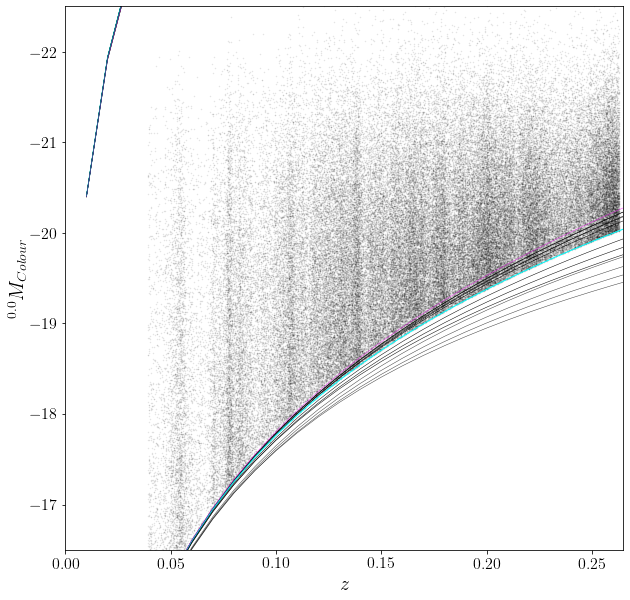

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

plt.scatter(gama_kE['ZGAMA'], gama_kE['DDPMALL_0P0'], s=0.25, alpha=0.1, c='k')

for i, ddp_limit in enumerate(ddp_limits):
    data = ddp_limit['DATA']
    cnt  = ddp_limit['COUNT']
    rlim = ddp_limit['RLIM']
    MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]
    
    if 'COLOR' in MCOL:
        alpha = 0.75
    else:
        alpha = 1.00
    
    if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
        ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
        continue
    
    if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tFAINT: {}'.format(cnt))
        
    elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tBRIGHT: {}'.format(cnt))
        
    else:
        ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
    
    print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
ax.set_xlabel(r'$z$')
ax.set_ylabel('$^{0.0}M_{Colour}$')

ax.set_xlim(  0.0, 0.265)
ax.set_ylim(-16.5, -22.5)

"\nfor idx, ax in zip(range(3), axes[::-1]):\n    zmin = gama_ddp.meta['DDP{}_ZMIN'.format(idx+1)]\n    zmax = gama_ddp.meta['DDP{}_ZMAX'.format(idx+1)]\n    \n    ax.axvline(zmin, lw=0.5, c='k')\n    ax.axvline(zmax, lw=0.5, c='k')\n"

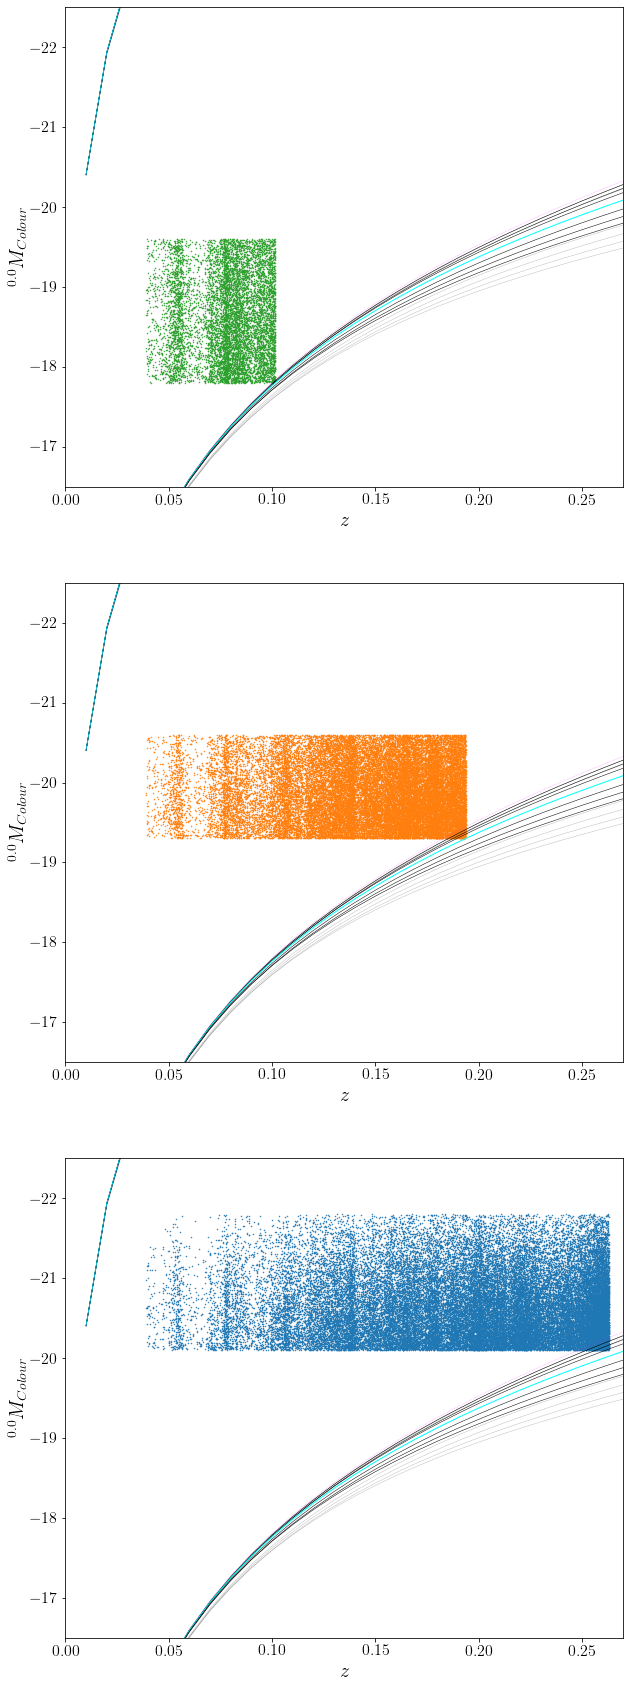

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(10,30))

colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ax in enumerate(axes[::-1]):    
    is_ddp = [x == 1 for x in gama_ddp['DDP'].data[:,i]]
    ax.scatter(gama_ddp['ZGAMA'][is_ddp], gama_ddp['DDPMALL_0P0'][is_ddp], s=0.25, alpha=1., c=colors[i])

for ax in axes:
    for i, ddp_limit in enumerate(ddp_limits):
        data = ddp_limit['DATA']

        cnt  = ddp_limit['COUNT']
        rlim = ddp_limit['RLIM']
        MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]

        if 'COLOR' in MCOL:
            alpha = 0.25
        else:
            alpha = 1.0

        if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
            ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
            continue
    
        if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        else:
            ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
        
        # print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
        ax.set_xlabel(r'$z$')
        ax.set_ylabel('$^{0.0}M_{Colour}$')
        
        ax.set_xlim(  0.0, 0.270)
        ax.set_ylim(-16.5, -22.5)

'''
for idx, ax in zip(range(3), axes[::-1]):
    zmin = gama_ddp.meta['DDP{}_ZMIN'.format(idx+1)]
    zmax = gama_ddp.meta['DDP{}_ZMAX'.format(idx+1)]
    
    ax.axvline(zmin, lw=0.5, c='k')
    ax.axvline(zmax, lw=0.5, c='k')
'''

# Done.